In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


In [0]:
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
# Defining class labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
num_classes=len(classes)

In [0]:
# Taking data and splitting into Train and Test samples
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

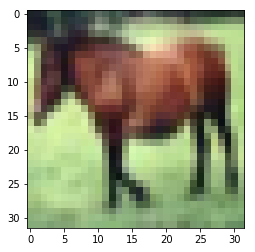

In [18]:
# Showing one element of training set
plt.imshow(X_train[7])

In [0]:
# Converting class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Normalizing training and test datasets
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [0]:
# Initializing Neural Network Model
model = Sequential()
# Adding 5 convolutional layers of 100 hidden units, using activation function=relu - Rectified Linear Unit
model.add(Conv2D(100,(3,3), input_shape = X_train.shape[1:],padding='same', activation = 'relu'))
model.add(Conv2D(100,(3,3),padding='same', activation = 'relu'))
model.add(Conv2D(100,(3,3),padding='same', activation = 'relu'))
model.add(Conv2D(100,(3,3),padding='same', activation = 'relu'))
model.add(Conv2D(100,(3,3),padding='same', activation = 'relu'))
# Flattening the input
model.add(Flatten())
# Adding a dense layer for the 10 classes,  element-wise activation function applied in this layer
model.add(Dense(num_classes, activation='softmax'))

In [0]:
# Compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
# Fitting model on CPU time : 640 sec time taken
model.fit(X_train, y_train, batch_size=300, epochs=10, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 66s 1ms/step - loss: 1.6102 - acc: 0.4194 - val_loss: 1.3000 - val_acc: 0.5330
Epoch 2/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.1449 - acc: 0.5964 - val_loss: 1.0154 - val_acc: 0.6452
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.9234 - acc: 0.6778 - val_loss: 0.9139 - val_acc: 0.6792
Epoch 4/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.7895 - acc: 0.7279 - val_loss: 0.8529 - val_acc: 0.7037
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.6898 - acc: 0.7613 - val_loss: 0.8031 - val_acc: 0.7209
Epoch 6/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.5959 - acc: 0.7929 - val_loss: 0.8246 - val_acc: 0.7222
Epoch 7/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.5107 - acc: 0.8232 - val_loss: 0.8057 - val_acc

In [92]:
# Displaying Testing accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 5s 473us/step
Test loss: 0.92
Test accuracy: 0.73


### Task 1: Data Augmentation

In [0]:
# Data Augmentation
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             rotation_range=45, # 45 degrees rotation of image
                             width_shift_range=0.2, # shifting images as fraction of total width
                             height_shift_range=0.2, # shifting images as fraction of total height
                             horizontal_flip=True) # Flipping image horizontally

datagen.fit(X_train)

### Task 2: CNN + Timing taken - GPU

In [16]:
#CNN on augmented data GPU

#Taking time
t0 = time.process_time()

# Fitting model on Generator data
model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=X_train.shape[0]//100,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    workers=4
                   )

t1 = time.process_time()

total = t1-t0
print("\n\nCNN: Time to run on Augmented Data = "+str(total) +" sec")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





500/500 [==============================] - 48s 96ms/step - loss: 1.8751 - acc: 0.3117 - val_loss: 1.5030 - val_acc: 0.4530
Epoch 2/50
500/500 [==============================] - 42s 84ms/step - loss: 1.5944 - acc: 0.4194 - val_loss: 1.3156 - val_acc: 0.5229
Epoch 3/50
500/500 [==============================] - 41s 82ms/step - loss: 1.4752 - acc: 0.4650 - val_loss: 1.2299 - val_acc: 0.5556
Epoch 4/50
500/500 [==============================] - 41s 82ms/step - loss: 1.3984 - acc: 0.4948 - val_loss: 1.2287 - val_acc: 0.5620
Epoch 5/50
500/500 [==============================] - 41s 82ms/step - loss: 1.3292 - acc: 0.5206 - val_loss: 1.1264 - val_acc: 0.5925
Epoch 6/50
500/500 [==============================] - 41s 82ms/step - loss: 1.2916 - acc: 0.5361 - val_loss: 1.0581 - val_acc: 0.6245
Epoch 7/50
500/500 [==============================] - 41s 83ms/step - loss: 1.2490 - acc: 0.55

In [93]:
# Displaying Testing accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 5s 479us/step
Test accuracy: 0.72


### Task 2: CNN + Timing taken - TPU

In [88]:
#CNN on augmented data TPU

#Taking time
t0 = time.process_time()

# Fitting model on Generator data
model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=X_train.shape[0]//100,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    workers=4
                   )

t1 = time.process_time()

total = t1-t0
print("\n\nCNN: TPU Time to run on Augmented Data = "+str(total) +" sec")

Epoch 1/50
500/500 [==============================] - 74s 148ms/step - loss: 1.8591 - acc: 0.3207 - val_loss: 1.6206 - val_acc: 0.4308
Epoch 2/50
500/500 [==============================] - 71s 142ms/step - loss: 1.6142 - acc: 0.4125 - val_loss: 1.5929 - val_acc: 0.4656
Epoch 3/50
500/500 [==============================] - 71s 142ms/step - loss: 1.4891 - acc: 0.4621 - val_loss: 1.2778 - val_acc: 0.5427
Epoch 4/50
500/500 [==============================] - 71s 142ms/step - loss: 1.3765 - acc: 0.5069 - val_loss: 1.3337 - val_acc: 0.5350
Epoch 5/50
500/500 [==============================] - 71s 142ms/step - loss: 1.3090 - acc: 0.5300 - val_loss: 1.1972 - val_acc: 0.5852
Epoch 6/50
500/500 [==============================] - 71s 142ms/step - loss: 1.2536 - acc: 0.5529 - val_loss: 1.1210 - val_acc: 0.6181
Epoch 7/50
500/500 [==============================] - 71s 142ms/step - loss: 1.2019 - acc: 0.5723 - val_loss: 1.1144 - val_acc: 0.6202
Epoch 8/50
500/500 [==============================] - 7

### Task 2: LSTM + Timing taken - GPU

In [78]:
# Reshaping X_train and test for LSTM
X_train=np.asarray(X_train.flatten()).reshape(50000,1,3072)
X_test=np.asarray(X_test.flatten()).reshape(10000,1,3072)

# Initializing model sequence
model = Sequential()

# Two LSTM layers with 1024 hidden units
model.add(layers.LSTM(1024, batch_input_shape=(1000,1, 3072), return_sequences=True, dropout=0.2))
model.add(layers.LSTM(1024))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (1000, 1, 1024)           16781312  
_________________________________________________________________
lstm_28 (LSTM)               (1000, 1024)              8392704   
_________________________________________________________________
dense_9 (Dense)              (1000, 10)                10250     
Total params: 25,184,266
Trainable params: 25,184,266
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling sequential LSTM model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [80]:
#LSTM on augmented data : on GPU

#Taking time
t0 = time.process_time()

model.fit(X_train, y_train, batch_size=1000,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    workers=4
                   )


t1 = time.process_time()

total = t1-t0
print("\n\nLSTM: GPU Time to run on Data = "+str(total) +" sec")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 175us/step - loss: 2.2938 - acc: 0.1257 - val_loss: 2.2635 - val_acc: 0.1846
Epoch 2/10
50000/50000 [==============================] - 5s 104us/step - loss: 2.2695 - acc: 0.1791 - val_loss: 2.2295 - val_acc: 0.2165
Epoch 3/10
50000/50000 [==============================] - 5s 105us/step - loss: 2.2456 - acc: 0.2053 - val_loss: 2.1967 - val_acc: 0.2353
Epoch 4/10
50000/50000 [==============================] - 5s 104us/step - loss: 2.2204 - acc: 0.2275 - val_loss: 2.1645 - val_acc: 0.2505
Epoch 5/10
50000/50000 [==============================] - 5s 104us/step - loss: 2.1946 - acc: 0.2413 - val_loss: 2.1369 - val_acc: 0.2537
Epoch 6/10
50000/50000 [==============================] - 5s 104us/step - loss: 2.1703 - acc: 0.2526 - val_loss: 2.1111 - val_acc: 0.2542
Epoch 7/10
50000/50000 [==============================] - 5s 104us/step - loss: 2.1467 - acc: 0.2574 - val_loss: 2.0860 - 

### Task 2: LSTM + Timing taken - TPU

In [8]:
#LSTM on augmented data : on TPU

#Taking time
t0 = time.process_time()

model.fit(X_train, y_train, batch_size=1000,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    workers=4
                   )


t1 = time.process_time()

total = t1-t0
print("\n\nLSTM: Time to run on Augmented Data = "+str(total) +" sec")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 165s 3ms/step - loss: 2.2902 - acc: 0.1344 - val_loss: 2.2635 - val_acc: 0.1942
Epoch 2/10
50000/50000 [==============================] - 160s 3ms/step - loss: 2.2682 - acc: 0.1777 - val_loss: 2.2303 - val_acc: 0.2257
Epoch 3/10
50000/50000 [==============================] - 160s 3ms/step - loss: 2.2459 - acc: 0.2083 - val_loss: 2.1994 - val_acc: 0.2460
Epoch 4/10
50000/50000 [==============================] - 159s 3ms/step - loss: 2.2230 - acc: 0.2259 - val_loss: 2.1672 - val_acc: 0.2669
Epoch 5/10
50000/50000 [==============================] - 159s 3ms/step - loss: 2.1974 - acc: 0.2448 - val_loss: 2.1360 - val_acc: 0.2713
Epoch 6/10
50000/50000 [==============================] - 158s 3ms/step - loss: 2.1723 - acc: 0.2573 - val_loss: 2.1068 - val_acc: 0.2786
Epoch 7/10
50000/500

## Task 3: CNN and LSTM - Timing taken by CPU

#### (for CNN) The estimated time taken by CPU for each epoch is ~ 40 minutes.  
#### (for LSTM) The estimated time taken by CPU for each epoch is ~ 30 minutes.  